<a href="https://colab.research.google.com/github/jelade/Twitter-Data-Analysis/blob/main/Task_3_Data_Science_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task 3 - Data Science Level 1**

---


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
from gensim import corpora
import pandas as pd
import statistics
import string
import os
import re
import json


from os import listdir
from os.path import isfile, join
from random import shuffle

import numpy as np
from joblib import dump, load # used for saving and loading sklearn objects
from scipy.sparse import save_npz, load_npz # used for saving and loading sparse matrices
from scipy.stats import uniform
from scipy.sparse import csr_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
#To Change my directory
os.chdir("drive/MyDrive")
os.listdir()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


['2012_2013_ms41_l2mass.pdf',
 'bonus.pdf',
 'Correction Tutorial1.pdf',
 'Correction Tutorial1.gdoc',
 'Colab Notebooks',
 'Classroom',
 'PROJET PYTHON DataC4.pdf',
 'Note_eleve.csv',
 'PROJET PYTHON DataC4.gdoc',
 'Note_eleve.gsheet',
 'Document sans titre.gdoc',
 'Abduljaleel Jaleel Adejumo - mnist.zip (Unzipped Files)',
 'Adejumo Abduljaleel.gdoc',
 'DEEP_LEARNING_PROJECT_2_MNIST_AISSATA_DIOP.ipynb',
 'DEEPLEARNINGPROJET_1_AISSATA_DIOP.ipynb',
 'Supervised on Python.zip',
 'Supervised.ipynb',
 '202102-divvy-tripdata.gsheet',
 '202201-divvy-tripdata.gsheet',
 'Abduljaleel_Adejumo_and_Mamadou_Waly_Dia_Manga',
 'My CV',
 'Resume for Jaleel.pdf',
 'assignment',
 'Transcript Adejumo a(1).pdf',
 'JALEEL EURO_merged (1).pdf',
 'Untitled spreadsheet.gsheet',
 'Improving the world.gdoc',
 'Improving world .gslides',
 'Understanding of the week0 project.gdoc',
 'My Documents',
 'cleaned_fintech_data.csv',
 'Task 2 Data Science Workflow & Engineering Pipeline.gslides',
 'Economic_Twitter_Data

In [ ]:
with open('Economic_Twitter_Data.json','r') as json_file:
  print(json_file.read())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
data = open('Economic_Twitter_Data.json','r').readlines()
rst = []
for ele in data:
    rst.append(json.loads(ele))

In [ ]:
rs = pd.DataFrame(rst)

In [ ]:
rs.shape

(24625, 30)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
data = rs[rs['lang']=='en']

In [ ]:
print("The number of missing value(s): {}".format(data.isnull().sum().sum()))
print("Columons having columns value:{}".format(data.columns[data.isnull().any()]))

The number of missing value(s): 226963
Columons having columns value:Index(['in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'geo', 'coordinates', 'place',
       'contributors', 'retweeted_status', 'extended_entities',
       'possibly_sensitive', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status', 'withheld_in_countries'],
      dtype='object')


In [ ]:
tweets_df = pd.DataFrame(columns=['text'])

tweets_df['text'] =  data['text'].to_list()

In [ ]:
tweets_df.dropna()
tweets_df

,text
0,RT @NorthstarCharts: The 10-year yield is tell...
1,RT @MichaelAArouet: German 10y mortgage rate w...
2,RT @goldseek: When? https://t.co/kO2FfHKaZg
3,RT @charliebilello: The 30-year mortgage rate ...
4,RT @biancoresearch: Rates rise until something...
...,...
16467,RT @CHARANJITCHANNI: Best wishes &amp; heartfe...
16468,RT @pbhushan1: Thank you @BajpayeeManoj for th...
16469,RT @s_shreyatweets: Agree ?👇 https://t.co/R54Z...
16470,RT @tejjINC: 1. Peace Yatra by Late Sunil Dutt...


In [ ]:
re.findall?

In [ ]:
#Method to find hashtags from tweets
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

In [ ]:
# update Hashtage columon with hashtages extracted from Orignal_text columon
tweets_df['hashtags'] = tweets_df.text.apply(find_hashtags)
print(tweets_df['hashtags'])

0        [#gold, #silver, #crypto]
1                               []
2                               []
3                               []
4                               []
                   ...            
16467                           []
16468                           []
16469                           []
16470                           []
16471                           []
Name: hashtags, Length: 16472, dtype: object


In [ ]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = tweets_df.loc[
                       tweets_df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [ ]:
hashtags_list_df

,hashtags
0,"[#gold, #silver, #crypto]"
5,[#bonds]
13,[#ECB]
14,"[#deflation, #Inventories, #NewOrders]"
16,"[#deflation, #oil, #gas, #energy]"
...,...
16456,"[#Telangana, #TRS]"
16457,"[#PNPKakampiMo, #WeServeAndProtect, #TeamPNP, ..."
16458,"[#PNPKakampiMo, #WeServeAndProtect, #TeamPNP, ..."
16459,"[#PNPKakampiMo, #WeServeAndProtect, #TeamPNP, ..."


In [ ]:
 #create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [ ]:
flattened_hashtags_df

,hashtag
0,#gold
1,#silver
2,#crypto
3,#bonds
4,#ECB
...,...
12424,#PCADGWESTERNMINDANAO
12425,#PNPKakampiMo
12426,#WeServeAndProtect
12427,#TeamPNP


In [ ]:
#add flatten_hashtags to tweet_df
tweets_df["flattened_hashtags"]= flattened_hashtags_df

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install emoji

     |████████████████████████████████| 175 kB 9.3 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=7819489f59ad0d0efe7251dc3e83aa62a707e2d8a2ea4ab0864e615038f287ac
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
from nltk.corpus import stopwords
import string
import emoji
from emoji import emojize
stopwords_full = list(stopwords.words('english'))

# Remove URL

def remove_URL(text):
    url = re.compile(r'http\S+')
    return url.sub(r'',text)

tweets_df['text'] = tweets_df['text'].apply(lambda x : remove_URL(x))
# Remove html tags

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

tweets_df['text']=tweets_df['text'].apply(lambda x : remove_html(x))
# Remove emojis

def remove_emojis(text):
  new_text = emoji.demojize(text, delimiters=("", "")) 
  return new_text

tweets_df['text'] = tweets_df['text'].apply(lambda x: remove_emojis(x))
# Remove mentions and hashtag

def remove_mention_hashtag(text):
    text=re.sub(r'@\w+','',text)        # remove mentions
    text=re.sub(r'#\w+','',text)        # remove hashtag
    return text

tweets_df['text']=tweets_df['text'].apply(lambda x: remove_mention_hashtag(x))

In [ ]:
# Remove Emails

def remove_emails(text):
  email = re.compile(r'\S*@\S*\s?')
  return email.sub(r'', text)

tweets_df['text']=tweets_df['text'].apply(lambda x : remove_emails(x))
# Remove new line characters

def remove_newline(text):
  newline = re.compile(r'\n+')
  return newline.sub(r'', text)

tweets_df['text']=tweets_df['text'].apply(lambda x : remove_newline(x))
# Remove extra white space left while removing stuff

def remove_space(text):
    whitespace_remove = re.compile(r'\s+')
    return whitespace_remove.sub(r' ', text)

tweets_df["text"]=tweets_df["text"].apply(lambda x: remove_space(x))

In [ ]:
tweets_df.head(10)

,text,hashtags,flattened_hashtags
0,RT : The 10-year yield is telling us that ther...,"[#gold, #silver, #crypto]",#gold
1,"RT : German 10y mortgage rate went from 0,8% t...",[],#silver
2,RT : When?,[],#crypto
3,RT : The 30-year mortgage rate in the US rises...,[],#bonds
4,RT : Rates rise until something breaks … is an...,[],#ECB
5,RT : Buying opportunities like this only occur...,[#bonds],#deflation
6,RT : Welcome to September 2018.Bond markets te...,[],#Inventories
7,"RT : The horse thinks one thing, and he that s...",[],#NewOrders
8,RT : Global growth optimism at all time lows! ...,[],#deflation
9,RT : This is the most important chart in the w...,[],#oil


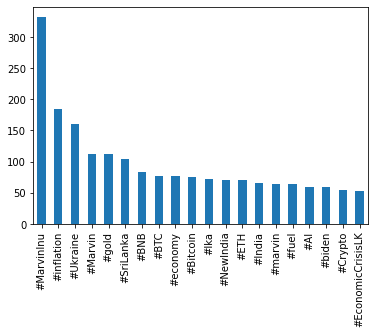

In [ ]:
# To plot Top 20 Hashtags
tweets_df['flattened_hashtags'].value_counts()[:20].plot(kind='bar')

In [ ]:
punct=string.punctuation+'”‘’“'

def clean_text(text):
#Make text lowercase
    text = text.lower()
#remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
#remove punctuation   
    text = re.sub(r'[%s]' % re.escape(punct), '', text)    
#remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)
    return text

tweets_df_clean = pd.DataFrame(tweets_df["text"].apply(lambda x: clean_text(x)))

In [ ]:
tweets_df_clean

,text
0,rt the yield is telling us that theres a hig...
1,rt german mortgage rate went from to backh...
2,rt when
3,rt the mortgage rate in the us rises to its...
4,rt rates rise until something breaks … is any...
...,...
16467,rt best wishes amp heartfelt congratulations ...
16468,rt thank you for this beautiful message of co...
16469,rt agree backhandindexpointingdown
16470,rt peace yatra by late sunil dutt from mumba...


In [ ]:
# remove stopwords
stopwords = nltk.corpus.stopwords.words("english")
custom_stopwords = ['hi', '&amp;', 'amp', 'amp;','rt', 'got', "it's", 'it’s', "i'm", 'im', 'want', 'like', '$', '@','covid','coronavirus','covid19','covid-19','u']
for i in custom_stopwords:
    stopwords.append(i)

def remove_stopwords(text):
    return " ".join(word for word in str(text).split() if word not in stopwords)
    
tweets_df_clean['text']=tweets_df_clean['text'].apply(lambda x: remove_stopwords(x))

In [ ]:
tweets_df_clean

,text
0,yield telling us theres high risk something br...
1,german mortgage rate went backhandindexpointin...
2,
3,mortgage rate us rises highest level since las...
4,rates rise something breaks … anything broken yet
...,...
16467,best wishes heartfelt congratulations ppcc pre...
16468,thank beautiful message communal harmony shown...
16469,agree backhandindexpointingdown
16470,peace yatra late sunil dutt mumbai towards amr...


In [ ]:
#text Preprocessing
tweets_df_clean['text']=tweets_df_clean['text'].astype(str)
tweets_df_clean['text'] = tweets_df_clean['text'].apply(lambda x: x.lower())
tweets_df_clean['text']= tweets_df_clean['text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))


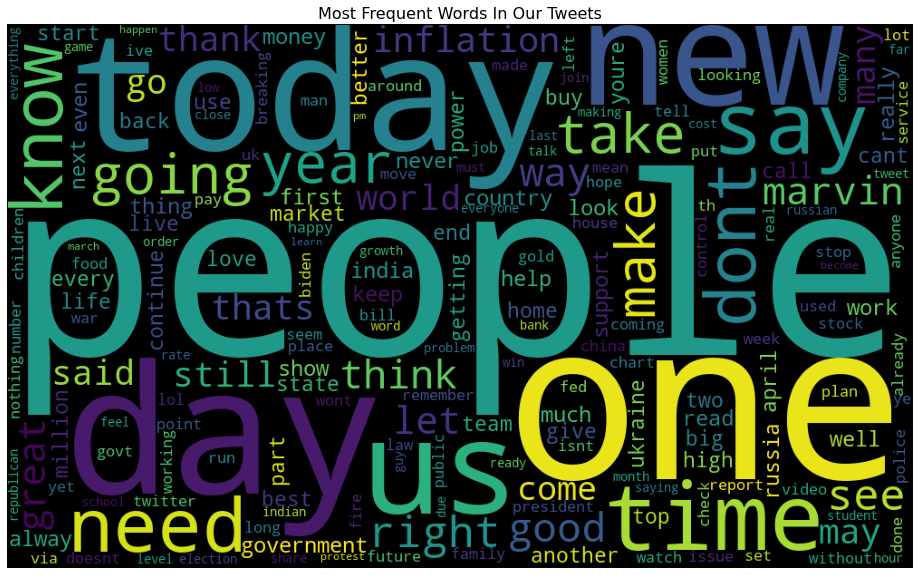

In [ ]:
plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(tweets_df_clean['text'].values)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.show()

In [ ]:
#Converting tweets to list of words For feature engineering
sentence_list = [tweet for tweet in tweets_df_clean['text']]
word_list = [sent.split() for sent in sentence_list]

word_list[:2]


[['yield',
  'telling',
  'us',
  'theres',
  'high',
  'risk',
  'something',
  'breaking',
  'system',
  '…'],
 ['german',
  'mortgage',
  'rate',
  'went',
  'backhandindexpointingdown',
  'hear',
  'sound',
  'german',
  'real',
  'estate',
  'bubble',
  'bursting']]

In [ ]:
#Create dictionary which contains Id and word 
word_to_id = corpora.Dictionary(word_list)
for k, v in word_to_id.items():
    print(k,"........",v)

Streaming output truncated to the last 5000 lines.
21047 ........ digest
21048 ........ nigel
21049 ........ pearson
21050 ........ topman
21051 ........ commentary
21052 ........ numb
21053 ........ alway…
21054 ........ drinkd…
21055 ........ familiar
21056 ........ airplanerollercoasterferriswheelstatueofliberty
21057 ........ presentation
21058 ........ wrexham
21059 ........ lates…
21060 ........ apprentice
21061 ........ bristol
21062 ........ daf
21063 ........ welc…
21064 ........ whistle
21065 ........ higgins
21066 ........ lep
21067 ........ gaga…
21068 ........ pallet
21069 ........ peterborou…
21070 ........ twpd
21071 ........ warehousing
21072 ........ shadows
21073 ........ zebras
21074 ........ want…
21075 ........ applaud
21076 ........ clappinghandslightskintoneclappinghandslightskintoneclappinghandslightskintoneclappinghandslightskintone
21077 ........ grinningfacewithsweatupsidedownface
21078 ........ walsall
21079 ........ bham
21080 ........ tor
21081 ........ me

In [ ]:
corpus_1 = [word_to_id.doc2bow(tweet) for tweet in word_list]

In [ ]:
corpus_1[:2]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1)],
 [(10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 2),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1)]]

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# Tokenization
tweets_df_clean["text"] = tweets_df_clean["text"].apply(word_tokenize)
# Lemmatization 
def lemmatizing(text):
    lemmatizer =WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in text]

tweets_df_clean["text"] = tweets_df_clean["text"].apply(lambda x: lemmatizing(x))

In [ ]:
# Flatten tweets
flat_list = [item for sublist in tweets_df_clean.text for item in sublist]

from sklearn.feature_extraction.text import CountVectorizer

# CountVectorize
vectorizer = CountVectorizer(
                            analyzer='word',       
                            min_df=3, # minimum required occurences of a word 
                            token_pattern='[a-zA-Z0-9]{3,}', # num chars > 3
                            max_features=5000, # max number of unique words
                            )
data_matrix = vectorizer.fit_transform(flat_list)

# The 10 most common words
sum_words = data_matrix.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:20]

[('people', 591),
 ('day', 527),
 ('get', 525),
 ('one', 509),
 ('time', 493),
 ('today', 466),
 ('new', 464),
 ('year', 458),
 ('price', 429),
 ('india', 403),
 ('dont', 380),
 ('marvin', 367),
 ('say', 350),
 ('know', 329),
 ('good', 326),
 ('need', 307),
 ('make', 296),
 ('best', 287),
 ('week', 285),
 ('take', 282)]

In [113]:
#Buidling the LDA model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import *
from sklearn.cluster import KMeans
import gensim
from gensim.corpora import Dictionary
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from pprint import pprint
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

#**KMeans (K)**


In [114]:
# Create a dictionary of tokens
id2word = Dictionary(list(tweets_df_clean["text"]))

# Create a corpus object. Term document frequency
corpus = [id2word.doc2bow(token) for token in tweets_df_clean["text"]]

In [117]:
kmeans = KMeans(n_clusters=4,random_state=0,n_init = 5).fit(data_matrix)